<a href="https://colab.research.google.com/github/austinbennysmith/CMIP6/blob/main/EEPS_1430/N_S_Temps/Plotting_NSTemps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installations and imports
!pip install fsspec
!pip install netCDF4
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;
!pip install shapely --no-binary shapely;
!pip install eofs
! pip install --upgrade xarray zarr gcsfs cftime nc-time-axis
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import fsspec
import gcsfs
from eofs.xarray import Eof
from nc_time_axis import NetCDFTimeConverter, CalendarDateTime
import cftime
from google.colab import drive
drive.mount('/content/gdrive')
images_dir = '/content/gdrive/My Drive/EEPS_1430/EEPS 1430 Final Project/images'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

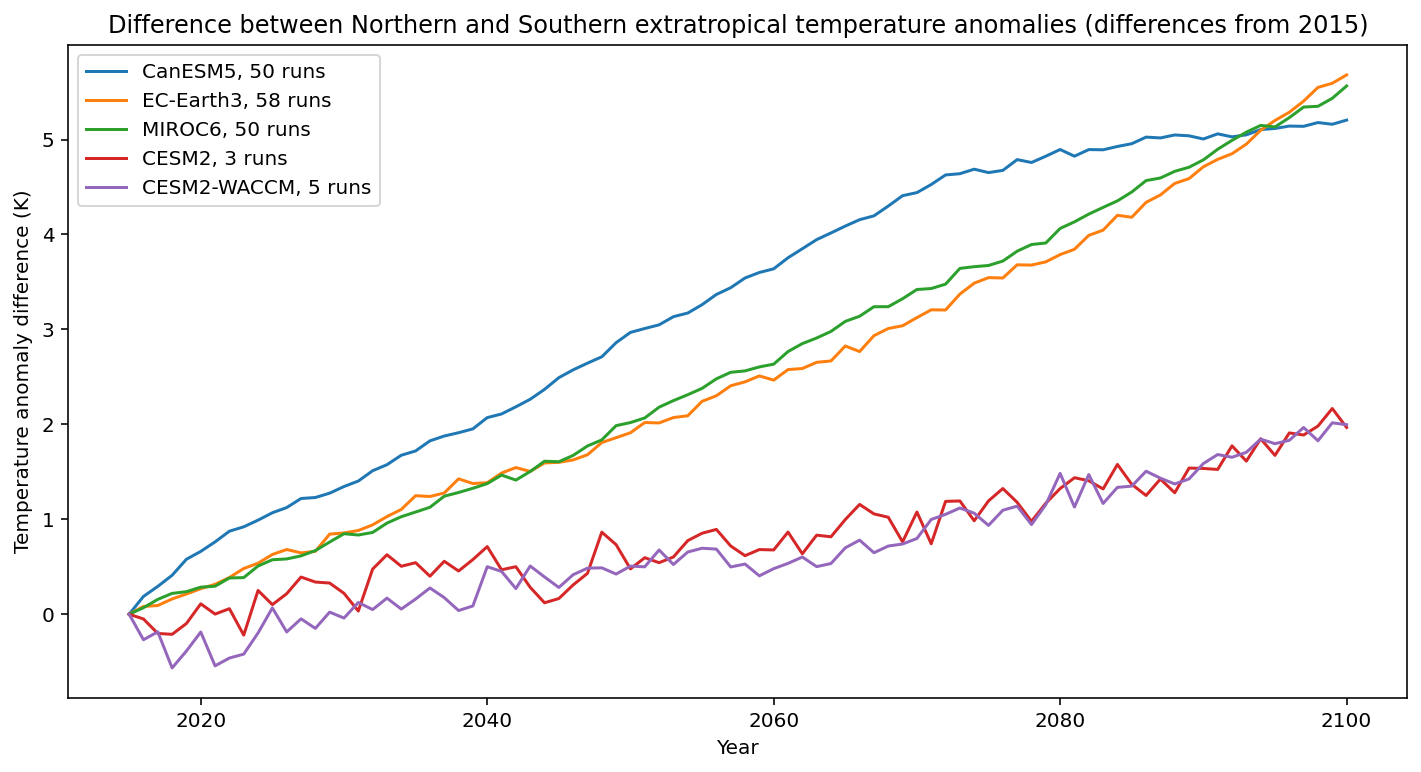

In [ ]:
# Loading in some previously generated average time series for the difference between average northern and southern extratropical temerature in a few different models, and then plotting them together to see the different predictions
ssp585_dir = '/content/gdrive/My Drive/EEPS_1430/EEPS 1430 Final Project/ssp585'
graph_dir = '/content/gdrive/My Drive/EEPS_1430/EEPS 1430 Final Project/tempgraphs'
CanESM5 = np.loadtxt(ssp585_dir+'/ssp585_CanESM5_memnum50_tempAvgs.csv', delimiter=',')
CESM2 = np.loadtxt(ssp585_dir+'/ssp585_CESM2_memnum3_tempAvgs.csv', delimiter=',')
CESM2_WACCM = np.loadtxt(ssp585_dir+'/ssp585_CESM2-WACCM_memnum5_tempAvgs.csv', delimiter=',')
EC_Earth3 = np.loadtxt(ssp585_dir+'/ssp585_EC-Earth3_memnum58_tempAvgs.csv', delimiter=',')
MIROC6 = np.loadtxt(ssp585_dir+'/ssp585_MIROC6_memnum50_tempAvgs.csv', delimiter=',')
models = {
    'CanESM5': CanESM5,
    'EC-Earth3': EC_Earth3,
    'MIROC6': MIROC6,
    'CESM2': CESM2,
    'CESM2-WACCM': CESM2_WACCM
}

runs = {
    'CanESM5': '50',
    'EC-Earth3': '58',
    'MIROC6': '50',
    'CESM2': '3',
    'CESM2-WACCM': '5'
}

years = np.arange(2015, 2101)

for key in models:
  plt.plot(years, models[key], label=key+', '+runs[key]+' runs')
plt.title('Difference between Northern and Southern extratropical temperature anomalies (differences from 2015)')
plt.xlabel('Year')
plt.ylabel('Temperature anomaly difference (K)')
plt.legend()
# plt.savefig(f"{graph_dir}/Difference_graphs.png")
plt.show()